
# Project: Investigate a Dataset (IMDb Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction

### 1.1 Data Description
This data set contains information about 10,000 movies collected from The Movie Database (TMDb) with the following columns:
> <ul>
    <li>id - a unique Number identifier</li>
    <li>imdb_id - a unique Number identifier given by the imdb</li>
    <li>popularity - how well a movie is admired or like by many people</li>
    <li>budget - the estimate expenditure amount for the movie (probably in dollar) </li>
    <li>revenue - the income amount generated on the movie (probably in dollar) </li>
    <li>original_title - Title of the movie</li>
    <li>cast - main actors in the movie</li>
    <li>homepage - landing page/website of the movie</li>
    <li>director -  the persons that directed the shooting of the movie</li>
    <li>tagline -  a movie slogan meant to give an idea about the movie</li>
    <li>keywords - keywords used for searching/defining the movie</li>
    <li>overview - brief intro/prelude about the movie</li>
    <li>runtime - the time duration for the movie (minute)</li>
    <li>genres - style or category of the movie</li>
    <li>production_companies - companies that involved in producing the movie</li>
    <li>release_date - the date the movie is made available to public</li>
    <li>vote_count - total votes for a movie</li>
    <li>vote_average - average of vote</li>
    <li>release_year - the year the movie is made available to public</li>
    <li>budget_adj - budget based on 2010 dollar inflation</li>
    <li>revenue_adj - revenue based on 2010 dollar inflation</li>
  </ul>

### 1.2 Questions
> 1. What are the Top 10 most popular movies?
2. What are the properties associated with popular movies
3. what are the Top 10 Highest Voted movies?
4. what are the Top 10 lengthiest movies?
5. what are the Top 10 most profited movies?
6. In which year there is a high release of movies? 
7. In which month there is a high release of movies?
8. What kinds of properties are associated with movie's genres?

<a id='wrangling'></a>
## 2. Data Wrangling


### 2.1 General Properties

In [43]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load and display the first 3 rows
pd.set_option('display.max_columns', None)
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
# summary of the dataset properties 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

From the original dataset we have seen the following properties:
> Number of rows/obersavation: 10866\
  Number of columns/features: 21\
  memory usage: 1.7 MB\
  4 columns are float\
  6 columns are int\
  11 columns are object (containing strings of characters)  

In [4]:
#descriptive statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


###  2.2 Assesments
>  - release_date have wrong datatype
>  - columns like imdb_id, overview, tagline, hompage, keywords, production_companies are not useful in my analysis
>  - some columns (e.g genres, homepage, cast etc) has empty field values
>  - original_title can be just 'title'
>  - some movies have 0 min runtime
>  - some movies have 0 budget
>  - some movies have 0 revenue generated
>  - since there is release_date no need of release_year for now
>  - since there is budget and revenue column, budget_adj and revenue_adj will not be used

### 2.3 Addressing the aformentioned issues
### i. Date datatype conversion


In [5]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [6]:
#date conversion
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].dtypes

dtype('<M8[ns]')

### ii. Drop unused columns

In [7]:
# since there is release date, using release is irrelevant in our case
# we wont pay attention to budget_adj and revenue_adj
df_new = df.copy()

col_drop = ['imdb_id','id','homepage','tagline','keywords','overview','production_companies','budget_adj','revenue_adj']
df_new.drop(col_drop, axis=1, inplace=True)

In [8]:
df_new.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015


### iii. rename original_title to title

In [9]:
# column renaming
df_new.rename(columns = {'original_title':'title'}, inplace=True)
df_new.head(2)

,popularity,budget,revenue,title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015


### iv. Handling Null and Duplicate values 

In [10]:
#check for null values
df_new.isnull().sum()

popularity       0
budget           0
revenue          0
title            0
cast            76
director        44
runtime          0
genres          23
release_date     0
vote_count       0
vote_average     0
release_year     0
dtype: int64

In [11]:
#drop all rows with null values
df_new.dropna(axis=0, inplace=True)

In [12]:
#check
df_new.isna().values.any()

False

In [13]:
#check for duplicates
df_new.duplicated().sum()

1

In [14]:
#duplicated rows 
df_new[df_new.duplicated()]

,popularity,budget,revenue,title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
2090,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,2010-03-20,110,5.0,2010


In [15]:
#drop duplicates row
df_new.drop_duplicates(inplace=True);

In [16]:
#check again
df_new.duplicated().sum()

0

### v. Handling runtime, budget and revenue of 0

In [17]:
# Handling runtime of 0
run_0 = df_new.query('runtime == 0').shape[0]
bud_0 = df_new.query('budget == 0').shape[0]
rev_0 = df_new.query('revenue == 0').shape[0]

print(f'There is {run_0} rows with 0 runtime, {bud_0} rows with 0 budget and {rev_0} with 0 revenue')

There is 28 rows with 0 runtime, 5578 rows with 0 budget and 5888 with 0 revenue


>After investigating the dataset, some entries has 0 budget but gain millions of revenue, while others have a budget but generated 0 revenue. there is data invalidity here, so we are droping all rows with 0 budget, runtime or revenue. we can browse the internet for the correct values but due to the time constraint of the project we will drop the affected records. 

In [18]:
#droping rows with 0 runtime, budget, or revenue
df_new = df_new.query('runtime != 0')
df_new = df_new.query('budget != 0')
df_new = df_new.query('revenue != 0')

In [19]:
df_new.shape

(3849, 12)

### Research Question 1: What are the Top 10 most popular movies?

In [224]:
#custome function for ploting
def plot_top_10(df,feature):
    '''
    plot the top 10 of the feature attribute specified
    arguments:
    df: the dataframe to extract the feature from
    feature: the attribute to plot its properties.
    output:
    display a plot. 
    '''
    df = df.nlargest(10,feature)[['title',feature]].set_index('title')
    plt.figure(figsize=(8,6))
    sns.barplot(x=df[feature],y=df.index,data=df,color='blue')
    #remove border axis (inspired by a stackoverflow question)
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    plt.title(f'Top 10 most {feature} movies')
    plt.ylabel('movies')
    plt.xlabel(feature)
    plt.show()
    

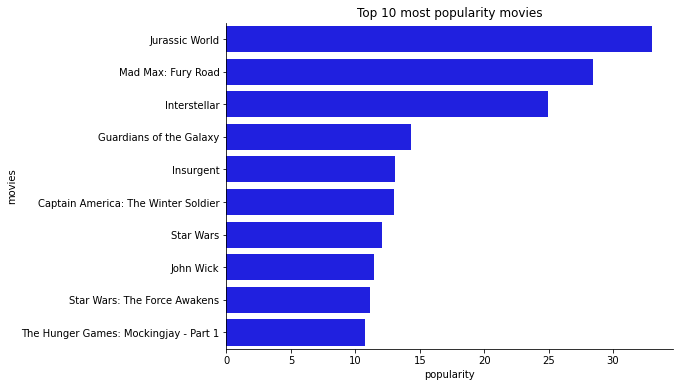

In [225]:
#most popular movies
plot_top_10(df_new,'popularity')

>Jurassic World is the most popular movie followed by the Mad Max: Fury Road and others, this can be used for making decisions and exploring other aspects like properties associated with the popular movies.

### Research Question 2: What are the properties associated with popular movies?

<AxesSubplot:xlabel='popularity', ylabel='vote_count'>

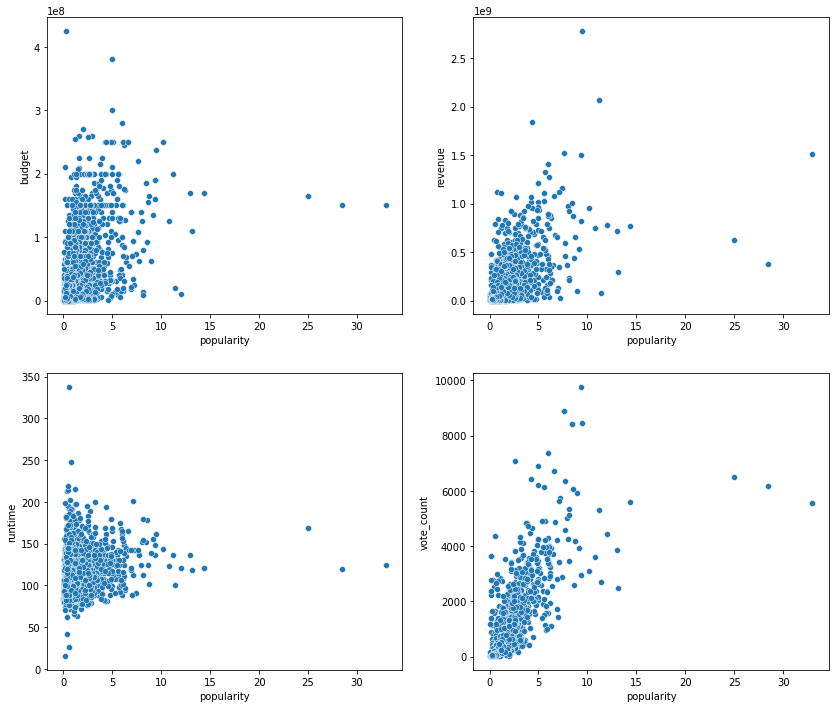

In [226]:
fig = plt.figure(figsize=(14,12))
#plot popularity with budget
plt.subplot(2,2,1)
sns.scatterplot(x='popularity',y='budget', data=df_new)
#plot popularity with revenue
plt.subplot(2,2,2)
sns.scatterplot(x='popularity',y='revenue', data=df_new)
#plot popularity with runtime
plt.subplot(2,2,3)
sns.scatterplot(x='popularity',y='runtime', data=df_new)
#plot popularity with vote_count
plt.subplot(2,2,4)
sns.scatterplot(x='popularity',y='vote_count', data=df_new)

>**Conclusion:**
from top-left to the bottom-right in the graph above we can conclude that popular movies are characterise by a reasonable budget above 100m though budget alone cant determine popularity. in the second frame revenue tend to influence a movie popularity, those movies with the runtime of 60minute to 160minutes tend to be popular, the relation between vote_count and popularity is strong, movies with high votes are popular.

### Research Question 3: What are the Top 10 most voted movies?

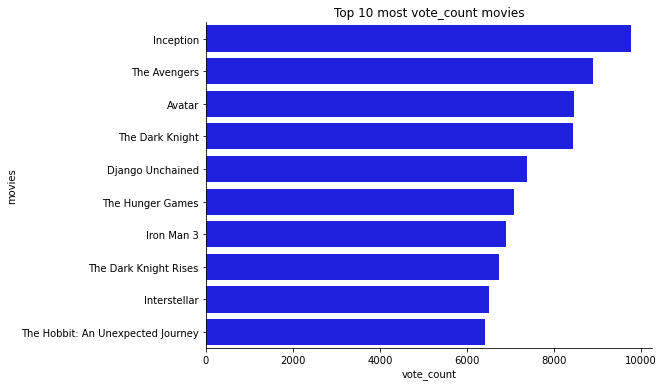

In [99]:
plot_top_10(df_new,'vote_count')

>Inception, the avengers and Avatar are the three most voted movies

### Research Question 4: What are the Top 10 lengthiest movies?

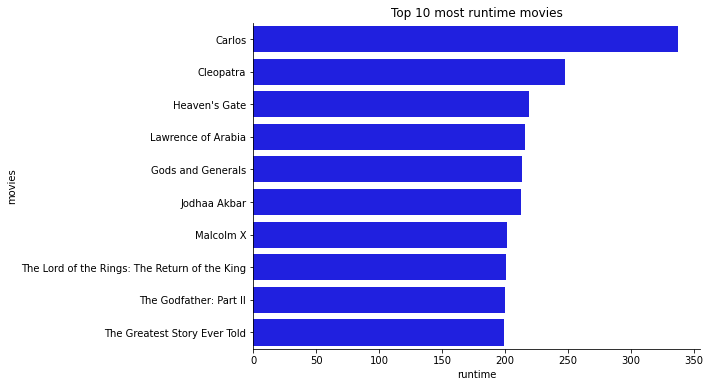

In [72]:
plot_top_10(df_new,'runtime')

>Carlos tend to be the movie with the most runtime.

### Research Question 5: What are the Top 10 most profited movies?

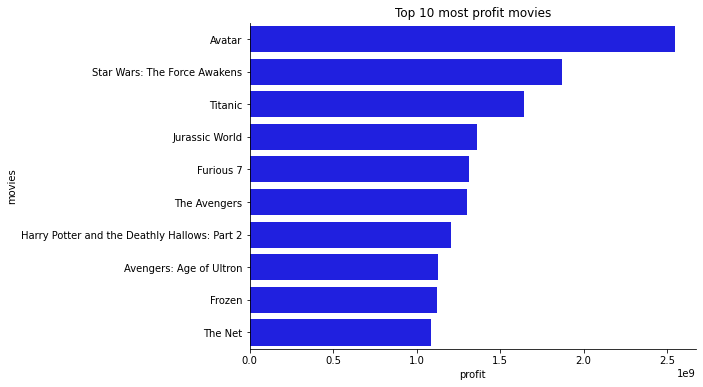

In [73]:
df_new['profit'] = df_new['revenue'] - df_new['budget']
plot_top_10(df_new,'profit')

> Avatar is the most profited movie, this will give us more room to inpect some characteristic of profited movies.

### Research Question 6: In which year there is high release of movies?

Text(0, 0.5, 'Count')

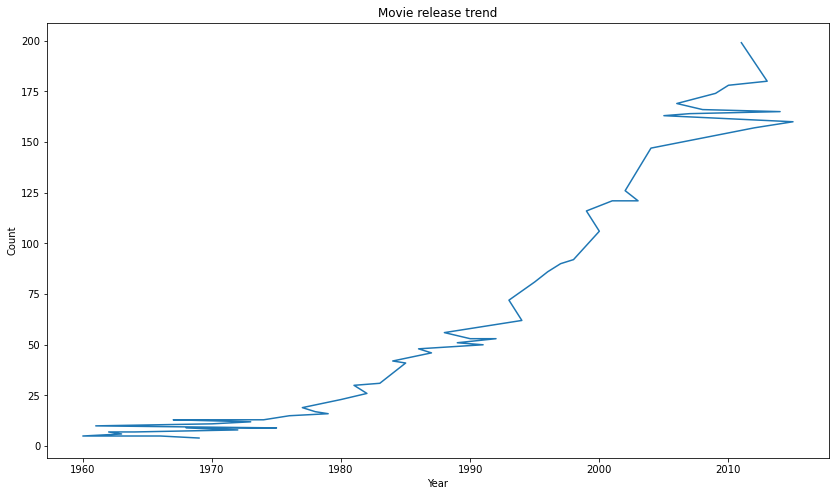

In [181]:
#lets see the value count
plt.figure(figsize=(14,8))
df_new['release_year'].value_counts().plot(kind='line')
plt.title('Movie release trend')
plt.xlabel('Year')
plt.ylabel('Count')

> Number of Movies release per year increases. the highest was in 2011 with 199 movies

### Research Question 7: In which month there is high release of movies?

In [221]:
#lets use the release_date attribute and extract month
df_month = df_new.release_date.dt.month.value_counts().sort_index()
months = ['January','February','March','April','May','June','July','August','September','October','November','December']

In [222]:
df_month

1     225
2     257
3     279
4     266
5     291
6     340
7     314
8     337
9     459
10    363
11    303
12    415
Name: release_date, dtype: int64

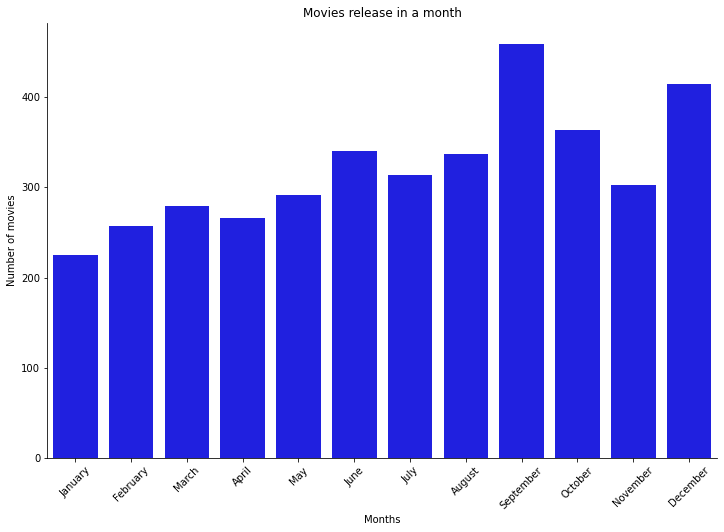

In [223]:
#plot
plt.figure(figsize=(12,8))
sns.barplot(x=months,y=df_month,data=df_month,color='blue')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.xticks(rotation=45)
plt.title(f'Movies release in a month')
plt.ylabel('Number of movies')
plt.xlabel('Months')
plt.show()

> Mostly, Movies are release in September, few are release in the early years like January, February etc. 

### Resaerch Question 8:  What are the properties associated with genres?

In [110]:
#inspired by this stackoverflow question
# https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows
# extract unique genres and in each row
df_new1 = df_new.copy()
df_new1['genres'] = df_new1['genres'].str.split('|').explode('genres')

In [126]:
#after exploding some genres are NaN
print(f'Before: {df_new1.genres.isnull().sum()}')
df_new1['genres'].fillna('Unknown', inplace=True)
# let's fill those genres with unknown
print(f'After: {df_new1.genres.isnull().sum()}')

Before: 0
After: 0


In [127]:
#Number of Unique genres
df_new1['genres'].nunique()

20

**plot the properties of genres**

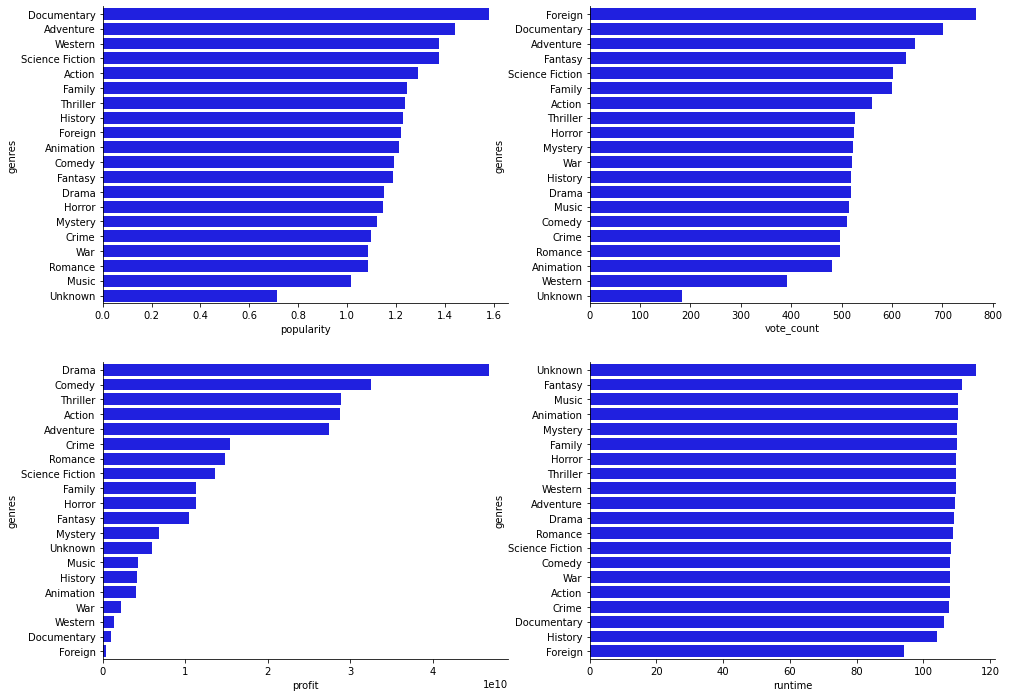

In [173]:
pop_genre = df_new1.groupby('genres', as_index=False)['popularity'].mean().sort_values(ascending=False, by='popularity')
vote_genre = df_new1.groupby('genres', as_index=False)['vote_count'].mean().sort_values(ascending=False, by='vote_count')
time_genre = df_new1.groupby('genres', as_index=False)['runtime'].mean().sort_values(ascending=False, by='runtime')
pro_genre = df_new1.groupby('genres', as_index=False)['profit'].sum().sort_values(ascending=False, by='profit')

fig = plt.figure(figsize=(16,12))
#plot genre with popularity
plt.subplot(2,2,1)
sns.barplot(x=pop_genre.popularity,y=pop_genre.genres,data=pop_genre,color='blue')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
#plot genre with vote_count
plt.subplot(2,2,2)
sns.barplot(x=vote_genre.vote_count,y=vote_genre.genres,data=vote_genre,color='blue')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
#plot genre with profit
plt.subplot(2,2,3)
sns.barplot(x=pro_genre.profit,y=pro_genre.genres,data=pro_genre,color='blue')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
#plot genre with runtime
plt.subplot(2,2,4)
sns.barplot(x=time_genre.runtime,y=time_genre.genres,data=time_genre,color='blue')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
#plt.title(f'Popular genres')
#plt.ylabel('Genres')
#plt.xlabel('Popularity')
plt.show()

> **Conclusion:**
from the graph above we have seen that Documentary are the most popular genres, Foreign genre happens to be the most voted genre, Drama is the profitable, so producers can pay attention to produce more movies with Drama genre. Lastly, the longest runtime genre is Unknown followed by Fantasy.

<a id='conclusions'></a>
## Conclusions

> From the above explorations, the followings are the findings:
> - The movie 'Jurasic world' is the most popular movie
> - Movies with budget above 100M tend to be popular
> - Movies that last  between 60minutes to 160minutes are popular
> - High voted movies are popular
> - The movie 'Inception' is the most voted movie, followed by Avengers and Avatar etc
> - The movie 'Avatar' is the most profited movie
> - Number of Movies release in year increases.
> - Mostly, movies are release in september
> - The movies fall in the 'foreign' genre happens to be the most voted movies
> - The movies fall in the 'Drama' genre happens to be the most profited. 

### Limitations

> - out of 10866 entries there are almost 1000 entries with NaN
> - columns like (runtime, budget and revenue) cannot have a value of zero, having 0 as a value signifies invalidy.
> - the dataset has less information about cast, more information about cast can open new ways of digging to get insights
> - less information is provided regarding popularity, vote_count. on what bases are they calculated?
> - Therefore, the above limitations can hindered my analysis in way or the other and the result of the analysis cannot be presented as a generalize finding of the work.